In [148]:
import fitz
import pandas as pd
from collections import Counter

import camelot
import requests

import json
from PIL import Image
import io
import pytesseract
from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import cv2

## PDF Extractor
### Example

In [12]:
doc = fitz.open('data/dissertation.pdf')
text = "".join(page.get_text("text") for page in doc)
words = pd.Series(text.split())
words.value_counts().head(15)

the     2640
.       2323
of      1580
to      1384
and     1174
a        977
in       694
is       612
for      524
that     507
be       431
data     407
The      361
are      349
with     337
dtype: int64

In [7]:
tables = camelot.read_pdf('data/calendar.pdf')
df = tables[0].df
df

,0,1,2,3,4
0,Fall,2020 Fall Term,,2021 Fall Term,
1,First Day of Classes,Tue,September 1,Tue,August 31
2,Labor Day - Classes Will Meet,Mon,September 7,,
3,Labor Day - Classes Suspended,,,Mon,September 6
4,Last day to add or drop courses,Tue,September 15,Tue,September 14
...,...,...,...,...,...
70,Summer Session - 10 week - classes begin,Mon,June 7,Mon,June 6
71,Last day to add or drop courses,Wed,June 16,Wed,June 15
72,Last day to change registration or withdraw fr...,Thur,July 15,Thur,July 14
73,Final Exams,Fri,August 13,Fri,August 12


### With Other Data

In [11]:
doc = fitz.open('data/Essay.pdf')
text = "".join(page.get_text("text") for page in doc)
words = pd.Series(text.split())
words.value_counts().head(15)

the       129
of        103
and        83
to         76
a          75
color      70
in         57
is         35
colors     30
on         28
be         26
with       24
for        22
that       22
can        21
dtype: int64

## Reddit Image Transcriber
### Example

In [94]:
# Getting titles and urls
data = requests.get("https://www.reddit.com/r/comics/.json", headers = {'User-agent': 'your bot 0.1'}).json()
children = data["data"]["children"]

comics = []
all_text = ""

for child in children:
    title = child["data"]["title"]
    url = child["data"]["url"]
    if(url.endswith(".png") | url.endswith(".jpg") ):
        comics.append({"title": title, "url":url})

# Passing to pytesseract 
for item in comics:
    url = item["url"]
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    text = pytesseract.image_to_string(img)
    all_text += text

print("Complete")

Complete


In [87]:
words = pd.Series(all_text.split())
print(words.value_counts())

THE        11
TO         10
|           8
A           8
HE          6
           ..
going       1
ie          1
the         1
WELCOME     1
ANGRY.      1
Length: 418, dtype: int64


In [88]:
blob = TextBlob(all_text)
print(blob.noun_phrases)
pd.Series(blob.word_counts).sort_values().tail(10)

['dude', 'love rock', 'hell yeah', 'like rock', 'rock', 'the best', 'mrlovenstein.com', "\\ 'm", 'dying', 'call', 'you have to call', 'it', '’ s', 'okay', 'understand', 'remi_lascault', '[ ngewe', 'cc', 'drowning in the burdens of my lifes man', "you're", 'fish', 'vve got fish burdens', 'poorly drawn lines', 'the', 'slime', 'beginners blade', 'welcome to your first dungeon', 'don t think were ready for that just yet', "let's come back later with some ice magi— h—-hey", 'don t just leave', 'thanks', 'meatball sub', 'sure', 't feel ugly', '“ m', 'going to dress vp', 'felissabumblehead', "'s ... um", 'may', 'pretty neat', 'instagram.com/sewergrandpascomics twitter.com/sewergrandpa work', 'wow to eat swake comics oh my gop t off ladder and my chainsaw lie still', 't know', 'jimbenton.com', '+ instagram.com/jimbentonshots lamthem te com neh orn', 'iwish', "n't geta", 'iwill', 'ithas', 'a468 picture it', 'fruit fly', 'but with the mind of albert einstein', 'it', '’ s', 'and he has', 'hours t

he      7
t       7
s       7
m       8
you    10
it     11
the    12
i      13
a      14
to     15
dtype: int64

### With Another Subreddit

In [93]:
# Getting titles and urls
data = requests.get("https://www.reddit.com/r/texts/.json", headers = {'User-agent': 'your bot 0.1'}).json()
children = data["data"]["children"]

textItems = []
all_text2 = ""

for child in children:
    title = child["data"]["title"]
    url = child["data"]["url"]
    if(url.endswith(".png") | url.endswith(".jpg") ):
        textItems.append({"title": title, "url":url})

# Passing to pytesseract 
for item in textItems:
    url = item["url"]
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    text = pytesseract.image_to_string(img)
    all_text2 += text

print("Complete")

Complete


this      8
an        9
am        9
is       10
it       12
in       12
and      13
my       14
what     14
to       14
today    15
i        17
pm       17
at       17
the      17
you      18
a        20
dtype: int64


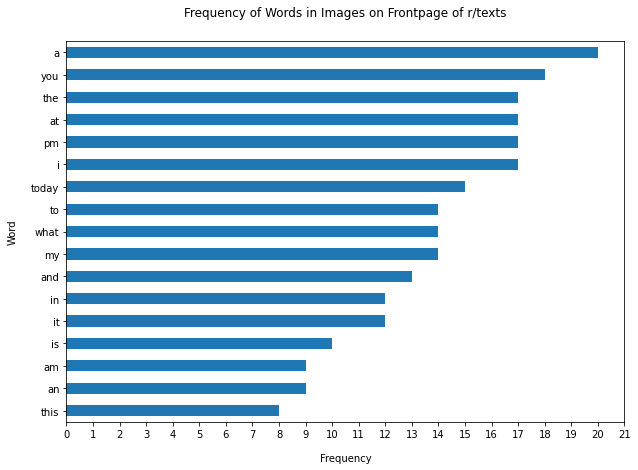

In [143]:
blob = TextBlob(all_text2)
words = pd.Series(blob.word_counts).sort_values().tail(20)
words = words.drop(labels=["©", "s", "o"]) # dropping non-words
print(words)

words.plot(kind='barh', figsize=(10, 7))
plt.xlabel("Frequency", labelpad=14)
plt.ylabel("Word", labelpad=14)
plt.title("Frequency of Words in Images on Frontpage of r/texts", y=1.05)
plt.xticks(np.arange(0, 22, 1.0))
plt.show()

## Open CV Face Finding

In [155]:
face_cascade = cv2.CascadeClassifier('classifiers/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('classifiers/haarcascade_eye.xml')

img = cv2.imread('images/1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imwrite('images/1-processed.jpg', img)

True